In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime

# Индивидуальные параметры, функции

In [3]:
A = np.pi / 2

# Плотность распределения
def f_small(l):
    return 1 / (l**2 + A**2)

# Функция распределения
def F_big(l):
    return 1 / A * np.arctan(l / A)

# Обратная к F_big. [0, 1] -> [0, +inf]
def F_inv(r):
    return A * np.tan(r*A)

dirs = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]])

# Моделирование

In [4]:
M = 100000
# N_list = np.array([100, 1000, 10000, 100000])
N_list = np.logspace(2, 6, 10).astype(int)
init_vals = np.zeros((2,M))
last_vals = np.zeros((len(N_list), 2, M))

In [5]:
N_list

array([    100,     278,     774,    2154,    5994,   16681,   46415,
        129154,  359381, 1000000])

In [6]:
init_vals

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(2, 100000))

In [ ]:
first_particle = [np.zeros((N,2)) for N in N_list]
for i, N in enumerate(N_list):
    curr_vals = init_vals.copy()
    for j in tqdm(range(N)):
        first_particle[i][j] = curr_vals[:,0]
        curr_l = F_inv(np.random.uniform(0, 1, size=M))
        curr_dirs = dirs[np.random.randint(0,4, size=M)].T
        curr_vals += curr_l * curr_dirs
        # assert curr_vals.shape == (2, M)
    last_vals[i] = curr_vals

  8%|▊         | 76449/1000000 [10:29<1:58:44, 129.62it/s]

In [4]:
# np.save(f'last_vals_{id}.npy', last_vals)
# for i, N in enumerate(N_list):
#     np.save(f'first_particle_{N}_{id}.npy', first_particle[i])
first_particle = [np.zeros((N,2)) for N in N_list]
for i, N in enumerate(N_list):
    _fp = np.load(f'result/first_particle_{N}_{i}.npy')
    first_particle[i] = _fp

last_vals=np.load(f'result/last_vals_9.npy')

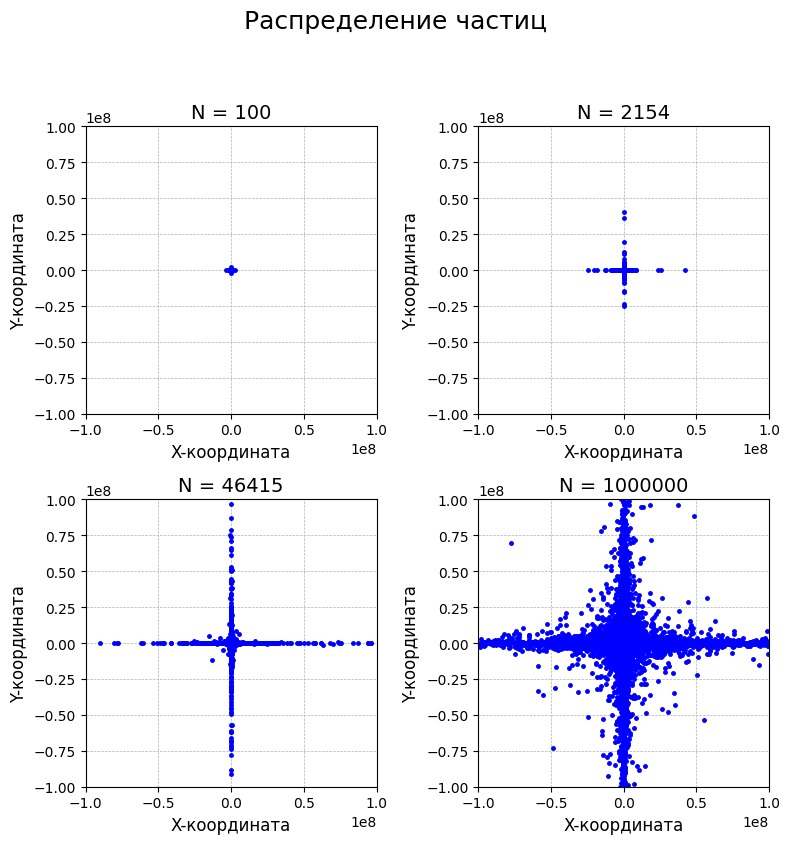

In [5]:
ax_lim = 1e8
# Настроим количество строк и столбцов
n_cols = 2  # два столбца
n_rows = len(N_list[::3]) // 2 + len(N_list[::3]) % 2  # рассчитываем количество строк

plt.figure(figsize=(4 * n_cols, 4 * n_rows))
plt.suptitle('Распределение частиц', fontsize=18, y=1.05)

for i, N in enumerate(N_list[::3]):
    row = i // n_cols  # номер строки
    col = i % n_cols   # номер столбца

    plt.subplot(n_rows, n_cols, 1 + row * n_cols + col)
    plt.title(f'N = {N}', fontsize=14)

    # Изменим цвет и маркер для улучшения визуализации
    plt.plot(last_vals[3*i, 0, :], last_vals[3*i, 1, :], '.', color='b', markersize=5)

    # Добавим подписи осей
    plt.xlabel('X-координата', fontsize=12)
    plt.ylabel('Y-координата', fontsize=12)

    # Установим ограничения осей и добавим сетку
    plt.xlim(-ax_lim, ax_lim)
    plt.ylim(-ax_lim, ax_lim)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Добавим отступы между подграфиками
plt.tight_layout()
plt.show()


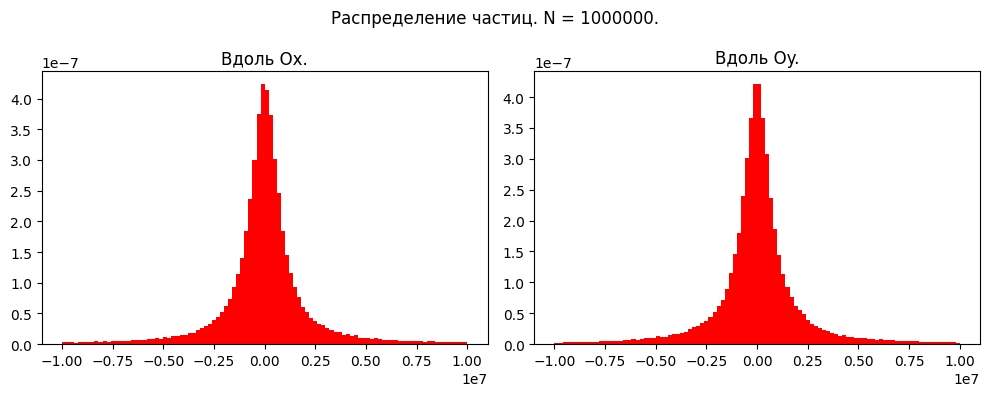

In [6]:
bin_cnt = 100
bin_w = 1/bin_cnt
_idx = 9
plt.figure(figsize=(10, 4))
plt.suptitle(f'Раcпределение частиц. N = {N_list[_idx]}.')

plt.subplot(1,2,1)
plt.hist(last_vals[_idx,0,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Ox.')

plt.subplot(1,2,2)
plt.hist(last_vals[_idx,1,:], bin_cnt, facecolor='r', density=True, label='E(X)', range=(-1e7, 1e7))
plt.title(f'Вдоль Oy.')

plt.tight_layout()
plt.show()

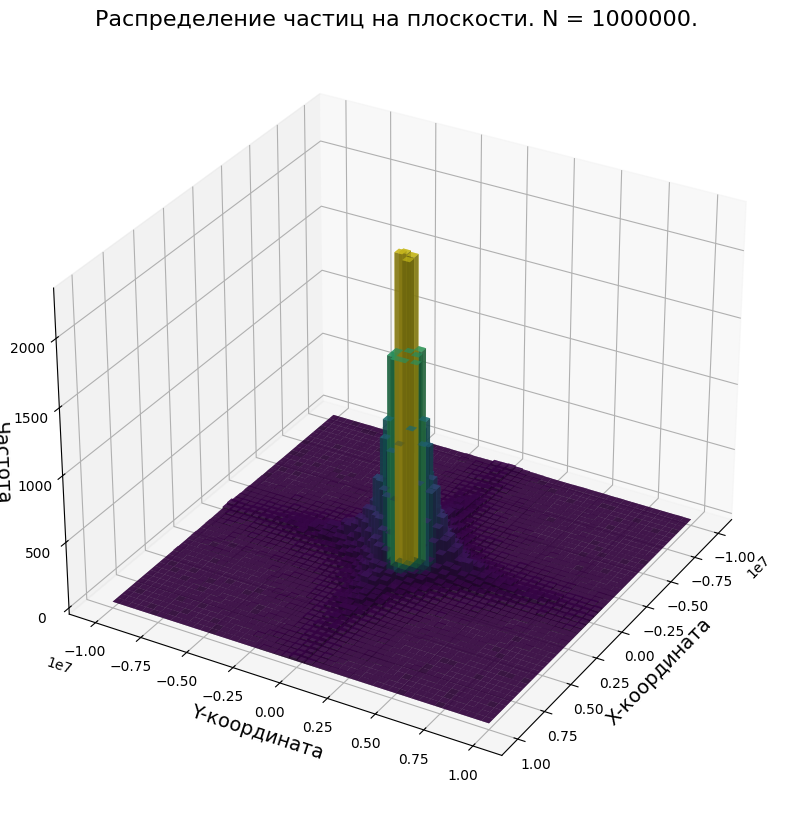

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Данные для графика
x, y = last_vals[_idx, 0, :], last_vals[_idx, 1, :]
_lim = 1e7
_bins = 50
hist, xedges, yedges = np.histogram2d(x, y, bins=_bins, range=[[-_lim, _lim], [-_lim, _lim]])

# Подготовка координат для столбцов
xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)

dx = dy = np.ones_like(zpos) * 2 * _lim / _bins
dz = hist.ravel()

# Настроим цвета
colors = plt.cm.viridis(dz / max(dz))  # Используем цветовую карту viridis для столбцов

# Построение 3D-гистограммы
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average', color=colors, alpha=0.7)

# Добавление подписей осей
ax.set_xlabel('X-координата', fontsize=14)
ax.set_ylabel('Y-координата', fontsize=14)
ax.set_zlabel('Частота', fontsize=14)

# Настройка заголовка
ax.set_title(f'Распределение частиц на плоскости. N = {N_list[_idx]}.', fontsize=16)

# Добавление сетки для лучшей видимости
ax.grid(True)

# Поворот камеры для лучшего восприятия
ax.view_init(elev=30, azim=30)

plt.show()


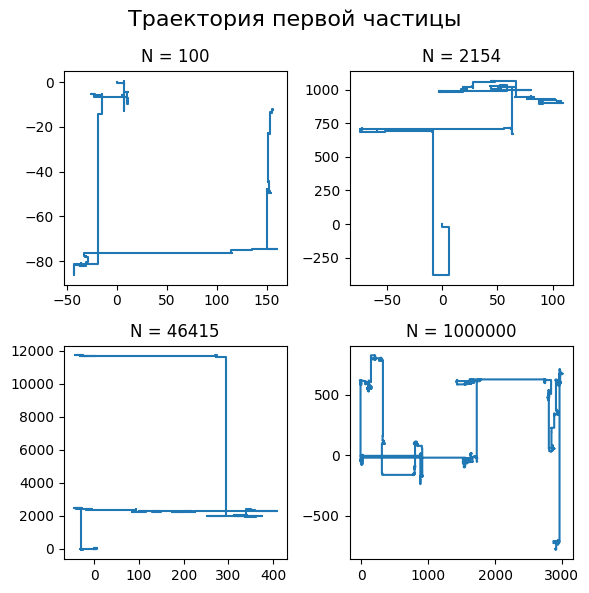

In [9]:
plt.figure(figsize=(6, 6))
plt.suptitle('Траектория первой частицы', fontsize=16)
for i, N in enumerate(N_list[::3]):
    plt.subplot(2, len(N_list[::3]) // 2, 1 + i)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], first_particle[i][:,1], '-')
    # plt.plot(first_particle[i][:,0], first_particle[i][:,1], '.')
plt.tight_layout()
plt.show()

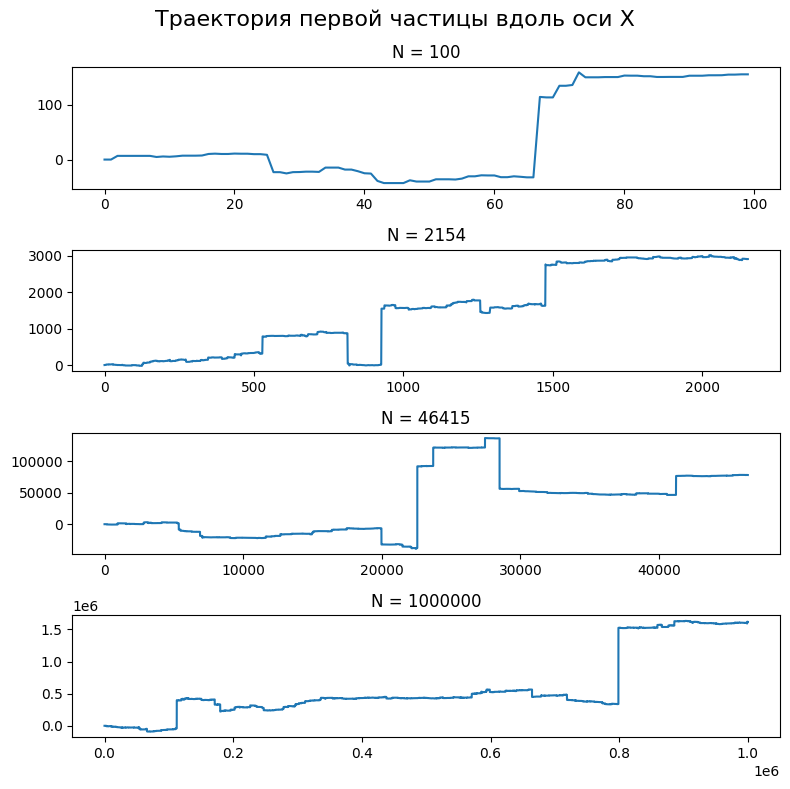

In [10]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси X', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,0], '-')
plt.tight_layout()
plt.show()

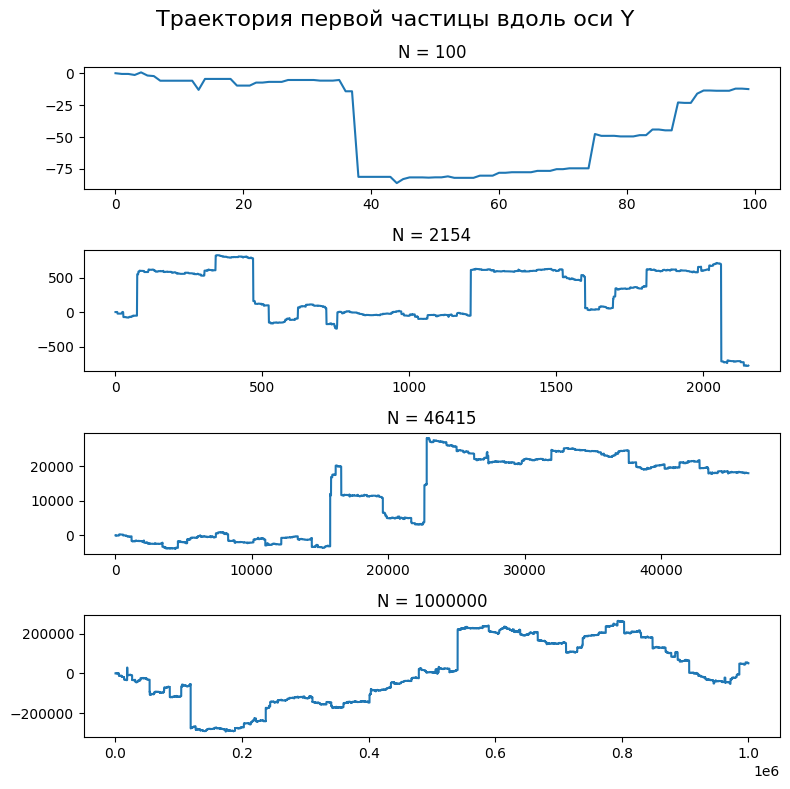

In [21]:
plt.figure(figsize=(8, 2*len(N_list[::3])))
plt.suptitle('Траектория первой частицы вдоль оси Y', fontsize=16)
for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    plt.title(f'N = {N}')
    plt.plot(first_particle[i][:,1], '-')
plt.tight_layout()
plt.show()

In [11]:
# длины случайных шагов первой частицы (сдвиги)
shifts_arr_lastN = np.abs((first_particle[-1][1:] - first_particle[-1][:-1]).sum(axis=1))
shifts_arr_lastN.shape

(999999,)

In [12]:
sig = 2 / (f_small(0)*np.sqrt(2*np.pi) )

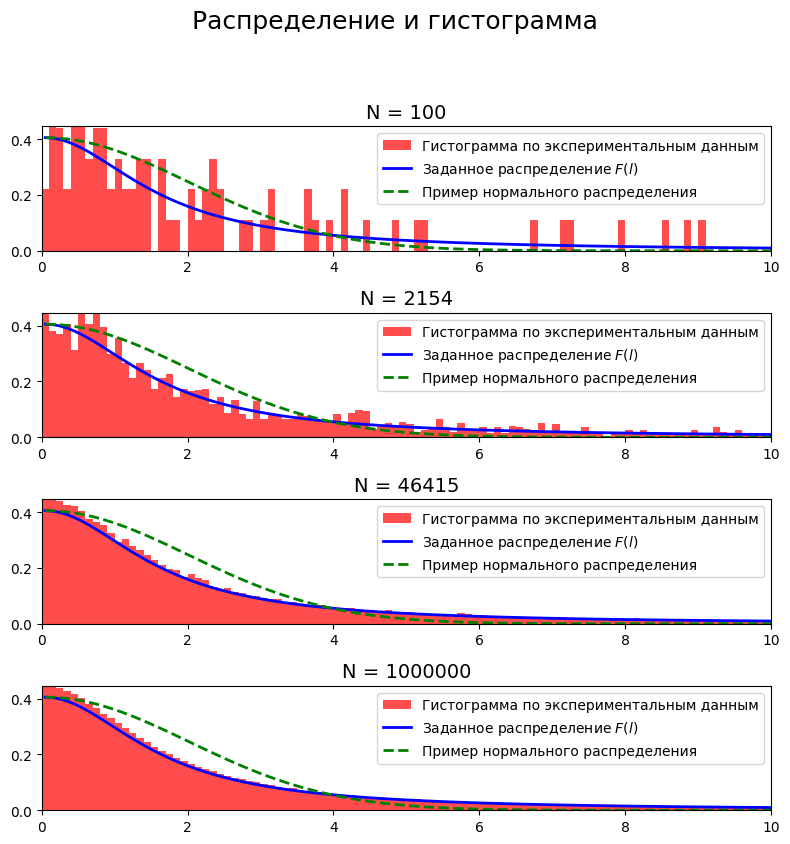

In [13]:
bin_cnt = 100  # кол-во столбиков
bin_w = 1 / bin_cnt
rng = (0, 10)  # диапазон отрисовки

_r = lambda x: 2 / np.sqrt(2 * np.pi * sig ** 2) * np.exp(-(x ** 2) / (2 * sig ** 2))

plt.figure(figsize=(8, 2 * len(N_list[::3])))
plt.suptitle('Распределение и гистограмма', fontsize=18, y=1.05)

for pl_idx, (i, N) in enumerate(list(enumerate(N_list[::]))[::3]):
    plt.subplot(len(N_list[::3]), 1, 1 + pl_idx)
    shifts_arr = np.abs((first_particle[i][1:] - first_particle[i][:-1]).sum(axis=1))

    # Гистограмма
    plt.hist(shifts_arr, bin_cnt, facecolor='r', density=True, range=rng, label='Гистограмма по экспериментальным данным', alpha=0.7)

    # Добавляем линии
    x_vals = np.linspace(rng[0], rng[1], bin_cnt)
    plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, f_small(x_vals), 'b-', label='Заданное распределение $F(l)$', linewidth=2)
    plt.plot(x_vals + (rng[1] - rng[0]) * 0.5 * bin_w, _r(x_vals), 'g--', label='Пример нормального распределения', linewidth=2)

    # Настройка заголовка и подписей осей
    plt.title(f'N = {N}', fontsize=14)
    # plt.xlabel('Сдвиг', fontsize=12)
    # plt.ylabel('Плотность вероятности', fontsize=12)

    # Легенда
    plt.legend(loc='upper right', fontsize=10)

    # Границы осей
    plt.xlim(rng)
    plt.ylim(0, max(f_small(x_vals).max(), _r(x_vals).max()) * 1.1)

# Автоматические отступы
plt.tight_layout()
plt.show()


In [ ]:
mean_vals = last_vals.mean(axis=2)
sq_mean_vals = (mean_vals**2)
r_vals = sq_mean_vals.sum(axis=1)**0.5
mean_sq_vals = (last_vals**2).mean(axis=2)
var_vals = last_vals.var(axis=2)
full_var_vals = var_vals.sum(axis=1)

In [ ]:
import pandas as pd

# Создаем список данных для каждой строки
data = []

for i, N in enumerate(N_list):
    data.append({
        'N': N,
        '<x>': mean_vals[i, 0],
        '<y>': mean_vals[i, 1],
        '<R>': r_vals[i],
        '<x^2>': mean_sq_vals[i, 0],
        '<y^2>': mean_sq_vals[i, 1],
        '<Δx^2>': var_vals[i, 0],
        '<Δy^2>': var_vals[i, 1],
        '<ΔR^2>': full_var_vals[i]
    })

# Создаем DataFrame
df = pd.DataFrame(data)

# Выводим DataFrame
print(df)


        N           <x>           <y>           <R>         <x^2>  \
0     100  -1126.662434    -88.491509   1130.132287  1.042440e+10   
1     215    -56.604530    -74.217472     93.339734  2.135827e+08   
2     464      0.922718   -581.143548    581.144280  7.414449e+08   
3    1000  -2004.504796   -116.802551   2007.904956  3.155288e+10   
4    2154   2179.545732    101.471383   2181.906514  5.806101e+10   
5    4641   1303.290441   2329.001698   2668.860222  2.348402e+10   
6   10000 -23924.376179  -2062.042378  24013.075487  7.789021e+12   
7   21544  32724.269805  50462.670483  60144.483924  9.343118e+12   
8   46415  47263.437345  33238.016280  57780.604322  1.970447e+13   
9  100000 -39906.308480  20401.657172  44818.981156  1.787621e+13   

          <y^2>        <Δx^2>        <Δy^2>        <ΔR^2>  
0  4.083136e+07  1.042313e+10  4.082353e+07  1.046396e+10  
1  7.761679e+07  2.135795e+08  7.761129e+07  2.911908e+08  
2  2.673477e+09  7.414449e+08  2.673140e+09  3.414584e+09  


In [ ]:
df.to_excel('results.xlsx', index=False, engine='openpyxl')

In [6]:
import pandas as pd
data = pd.read_excel('results.xlsx')
data

,N,<x>,<y>,<R>,<x^2>,<y^2>,<Δx^2>,<Δy^2>,<ΔR^2>
0,100,-5.074448e+01,-2.011551e+01,5.458604e+01,3.237921e+08,1.372699e+08,3.237895e+08,1.372695e+08,4.610590e+08
1,278,3.606890e+02,7.865766e+01,3.691661e+02,7.205361e+09,4.083222e+09,7.205231e+09,4.083215e+09,1.128845e+10
2,774,1.113131e+03,-7.172144e+02,1.324182e+03,2.254243e+11,2.790017e+11,2.254230e+11,2.790012e+11,5.044242e+11
3,2154,-9.027212e+03,1.124644e+03,9.096998e+03,4.126361e+12,5.838849e+11,4.126279e+12,5.838836e+11,4.710163e+12
4,5994,4.497143e+03,3.674236e+04,3.701656e+04,3.128362e+12,1.111969e+14,3.128342e+12,1.111955e+14,1.143239e+14
5,16681,-1.436397e+04,8.545517e+03,1.671375e+04,4.176885e+13,8.507056e+14,4.176864e+13,8.507055e+14,8.924742e+14
6,46415,-7.504991e+03,3.782859e+04,3.856588e+04,3.094471e+13,8.980876e+13,3.094465e+13,8.980733e+13,1.207520e+14
7,129154,1.841060e+05,-2.963140e+03,1.841298e+05,3.196837e+15,3.857661e+14,3.196803e+15,3.857660e+14,3.582569e+15
8,359381,-2.581440e+04,-7.576042e+05,7.580438e+05,4.137909e+15,4.396638e+16,4.137908e+15,4.396581e+16,4.810372e+16
9,1000000,-1.158618e+07,-5.279569e+06,1.273237e+07,6.694786e+18,1.935806e+18,6.694651e+18,1.935779e+18,8.630430e+18


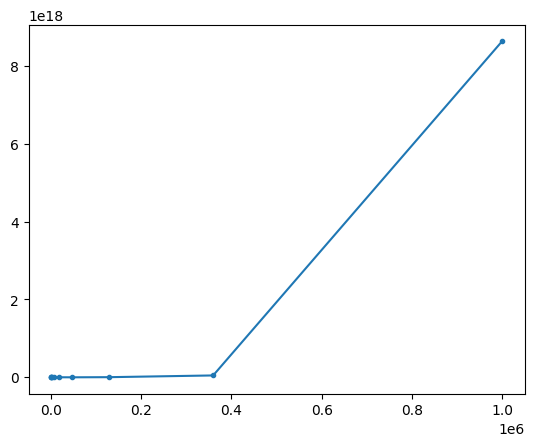

In [ ]:
plt.plot(N_list,data['<ΔR^2>'], '.-')

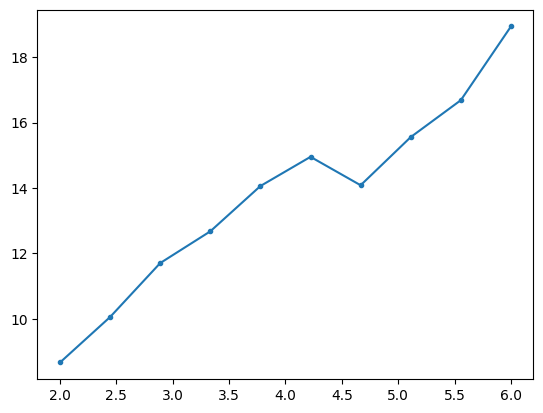

In [ ]:
plt.plot(np.log10(N_list), np.log10(data['<ΔR^2>']) , '.-')

In [35]:
x = np.log10(N_list)
y = np.log10(data['<ΔR^2>'])

In [36]:
lg_mu = (y.mean()*(x**2).mean() - (x*y).mean()*x.mean())/((x**2).mean() - x.mean()**2)
float(lg_mu)

4.832523714863872

In [49]:
mu = 10**lg_mu
float(mu)

68002.31769896824

In [45]:
nu = ((x*y).mean() - y.mean()*x.mean())/((x**2).mean() - x.mean()**2)
float(nu)

2.2257898665749756

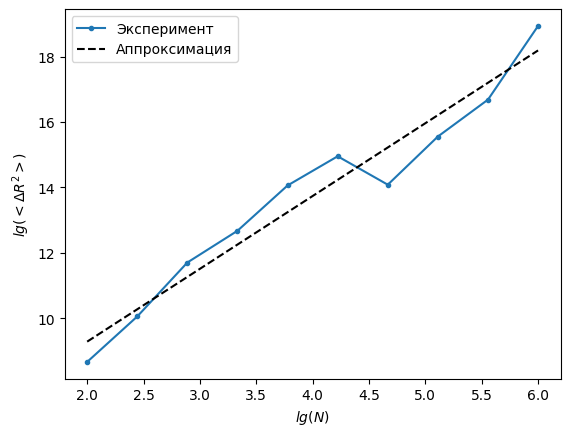

In [30]:

plt.plot(np.log10(N_list), np.log10(data['<ΔR^2>']),'.-', label='Эксперимент')
plt.plot(np.log10(N_list), lg_mu + nu*np.log10(N_list),'k--', label='Аппроксимация')
plt.ylabel('$lg(<ΔR^2>)$')
plt.xlabel('$lg(N)$')
plt.legend()
plt.show()

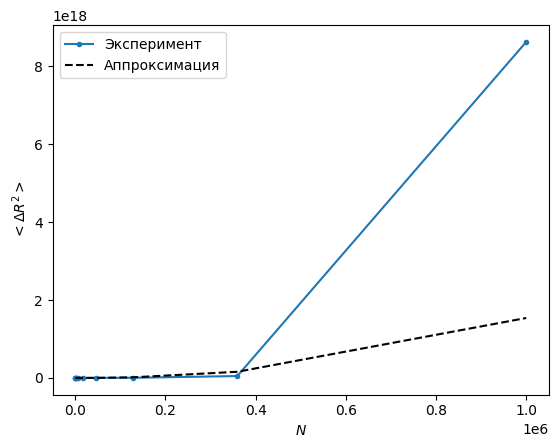

In [39]:
plt.plot(N_list,data['<ΔR^2>'],'.-', label='Эксперимент')
plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')
plt.ylabel('$<ΔR^2>$')
plt.xlabel('$N$')
plt.legend()
plt.show()

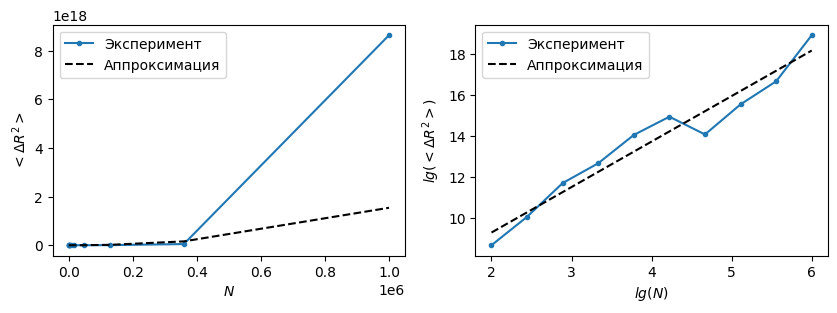

In [43]:
plt.figure(figsize=(10, 3))

plt.subplot(1,2,1)
plt.plot(N_list,data['<ΔR^2>'],'.-', label='Эксперимент')
plt.plot(N_list, mu*(N_list**nu),'k--', label='Аппроксимация')
plt.ylabel('$<ΔR^2>$')
plt.xlabel('$N$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.log10(N_list), np.log10(data['<ΔR^2>']),'.-', label='Эксперимент')
plt.plot(np.log10(N_list), lg_mu + nu*np.log10(N_list),'k--', label='Аппроксимация')
plt.ylabel('$lg(<ΔR^2>)$')
plt.xlabel('$lg(N)$')
plt.legend()

plt.show()